# Project Title

# ***Used car price prediction using Machine Learning.***

# **AUTHOR : Priyanshi Agarwal**
# **REGISTER ID : SIRSS1156**

# Dataset link:[True Value Cars](https://www.kaggle.com/focusedmonk/true-value-cars-dataset)

# **CONTENT**


# 1.   Context
# 2.  Problem Statement
# 3. Data Description
# 4. Importing Libraries
# 5. Loading Train data
# 6. Getting information about Data
# 7. Correlation
# 8.Handling missing values
# 9.Handling Outliers
# 10.Exploratory Data Analysis
# 11.Loading and Handling Test Data
# 12.Transformation for feature variables
# 13.Training our Models




*  Linear Regression
*  Lasso Regression
*  Ridge Regression
*  Random Forest Regression
*  XGBoost Regression

# 14.Model Evaluation
# 15.Comparing Model Performances
# 16.Conclusion




# 1.  Context

**What determines the price of used cars?**

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.

In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value.

The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value.

# 2.Problem Statement

The prices of new cars in the industry is fixed by the manufacturer with some additional costs
incurred by the Government in the form of taxes. So, customers buying a new car can be
assured of the money they invest to be worthy. But due to the increased price of new cars and
the inability of customers to buy new cars due to the lack of funds, used cars sales are on a
global increase (Pal, Arora and Palakurthy, 2018). There is a need for a used car price
prediction system to effectively determine the worthiness of the car using a variety of features.
Even though there are websites that offers this service, their prediction method may not be the
best. Besides, different models and systems may contribute on predicting power for a used car’s
actual market value. It is important to know their actual market value while both buying and
selling.


# 3. Data Description

This dataset contains over 7000+ true value cars data across all major tier 1 and tier 2 cities in India which is ready to accept a different owner. The information includes car manufacturer, model, fuel type, year of manufacture to mention a few. 

Content:

**id**: Unique ID for every car

**car_name**: Name of a car

**yr_mfr**: Car manufactured year

**fuel_type**: Type of fuel car runs on

**kms_run**: Number of kilometers run

**body_type**: Car body type. Ex: Sedan, hatchback etc.

**transmission**: Type of transmission. Ex: Manual, Automatic

**variant**: Car variant

**make**: Car manufacturing company

**model**: Car model name

**is_hot**: Is it a top selling car? Indicates the demand for a car.

**car_availability**: Car availability status

**total_owners**: How many owners have already owned it?

**car_rating**: How good is the car to buy?

**fitness_certificate**: Does the car have fitness certificate?

**source**: Method of selling a car

**registered_city**: City where the car is registered

**registered_state**: State where the car is registered

**rto**: Regional Transport Office where the car is registered

**city**: City where the car is being sold

**times_viewed**: Number of times people have shown interest for the car

**assured_buy**: Broker assured car

**broker_quote**: Price quoted for previous owner (in INR)

**original_price**: Original price of a car (in INR)

**emi_starts_from**: Opting for EMI? Monthly EMI for the car starts from! (in 
INR)

**booking_down_pymnt**: Decided to buy? Please pay the down payment (in INR)

**ad_created_on**: Listed date for selling a car

**reserved**: Car reserved status

**warranty_avail**: Warranty availability status

**sale_price**: Selling price of a car (in INR)'''

# 4. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 5. Loading Train data

In [ ]:
df=pd.read_csv('train.csv')


In [ ]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


# 6. Getting information about Data

In [ ]:
df.shape #to know rows and columns

(6399, 30)

In [ ]:
df.columns #column names

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

**value count**

In [ ]:
df['car_name'].value_counts()

maruti swift                478
maruti swift dzire          332
hyundai i10                 330
maruti wagon r 1.0          292
hyundai grand i10           246
                           ... 
mahindra maxximo              1
tata sumo gold                1
isuzu mu-7                    1
hyundai sonata transform      1
isuzu d-max v cross           1
Name: car_name, Length: 182, dtype: int64

In [ ]:
df['city'].value_counts()

mumbai       1144
bengaluru    1069
new delhi     986
pune          670
chennai       627
hyderabad     549
ahmedabad     354
gurgaon       313
noida         277
ghaziabad     194
faridabad     102
lucknow        91
kolkata        23
Name: city, dtype: int64

In [ ]:
df['sale_price'].value_counts()

300000    20
350000    14
250000    14
150000    13
400000    12
          ..
396199     1
779199     1
489199     1
401999     1
711999     1
Name: sale_price, Length: 4118, dtype: int64

In [ ]:
df.info() #info about each column how many nullvalues and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6399 non-null   int64  
 1   car_name             6399 non-null   object 
 2   yr_mfr               6399 non-null   int64  
 3   fuel_type            6399 non-null   object 
 4   kms_run              6399 non-null   int64  
 5   sale_price           6399 non-null   int64  
 6   city                 6399 non-null   object 
 7   times_viewed         6399 non-null   int64  
 8   body_type            6309 non-null   object 
 9   transmission         5925 non-null   object 
 10  variant              6399 non-null   object 
 11  assured_buy          6399 non-null   bool   
 12  registered_city      6391 non-null   object 
 13  registered_state     6391 non-null   object 
 14  is_hot               6399 non-null   bool   
 15  rto                  6399 non-null   o

In [ ]:
df.nunique(axis=0) #no of unique values in each column

id                     6399
car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6243
sale_price             4118
city                     13
times_viewed           2954
body_type                 5
transmission              2
variant                 873
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
broker_quote           5693
original_price         3476
car_rating                4
ad_created_on          6398
fitness_certificate       2
emi_starts_from        4048
booking_down_pymnt     4048
reserved                  2
warranty_avail            2
dtype: int64

In [ ]:
df.duplicated().sum() #no duplicate values

0

**No duplicate records**

In [ ]:
df.isnull().sum() #checking for null values

id                        0
car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

**Here original_price column contains more null values so we can decide after correaltion analysis whether to  remove it or not**

# 7. Correlation

In [ ]:
corr=df.corr() #to find correlation
corr

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
id,1.000000,0.089709,0.015080,0.032071,0.009603,0.023037,-0.080135,-0.009446,0.008309,-0.000049,0.032071,0.032071,0.004702,0.014275
yr_mfr,0.089709,1.000000,-0.396612,0.521379,0.067565,0.119977,0.204486,-0.295556,0.542951,0.502866,0.521379,0.521379,0.100374,-0.003712
kms_run,0.015080,-0.396612,1.000000,-0.098388,-0.115663,-0.015230,-0.118013,0.136007,-0.121848,-0.082849,-0.098389,-0.098388,-0.081682,0.016345
sale_price,0.032071,0.521379,-0.098388,1.000000,0.098256,0.032198,0.065627,-0.127794,0.961021,0.986196,1.000000,1.000000,0.054197,-0.013129
times_viewed,0.009603,0.067565,-0.115663,0.098256,1.000000,0.079840,0.184748,0.002830,0.131855,0.092438,0.098256,0.098256,0.223501,-0.047353
assured_buy,0.023037,0.119977,-0.015230,0.032198,0.079840,1.000000,0.380024,-0.073470,0.078595,0.009191,0.032197,0.032198,0.071509,-0.027761
is_hot,-0.080135,0.204486,-0.118013,0.065627,0.184748,0.380024,1.000000,-0.125427,0.184548,0.010380,0.065626,0.065628,0.147890,-0.348627
total_owners,-0.009446,-0.295556,0.136007,-0.127794,0.002830,-0.073470,-0.125427,1.000000,-0.150618,-0.080680,-0.127793,-0.127794,-0.056257,0.011473
broker_quote,0.008309,0.542951,-0.121848,0.961021,0.131855,0.078595,0.184548,-0.150618,1.000000,0.985439,0.961020,0.961021,0.085843,-0.061038
original_price,-0.000049,0.502866,-0.082849,0.986196,0.092438,0.009191,0.010380,-0.080680,0.985439,1.000000,0.986196,0.986196,0.080518,-0.004814


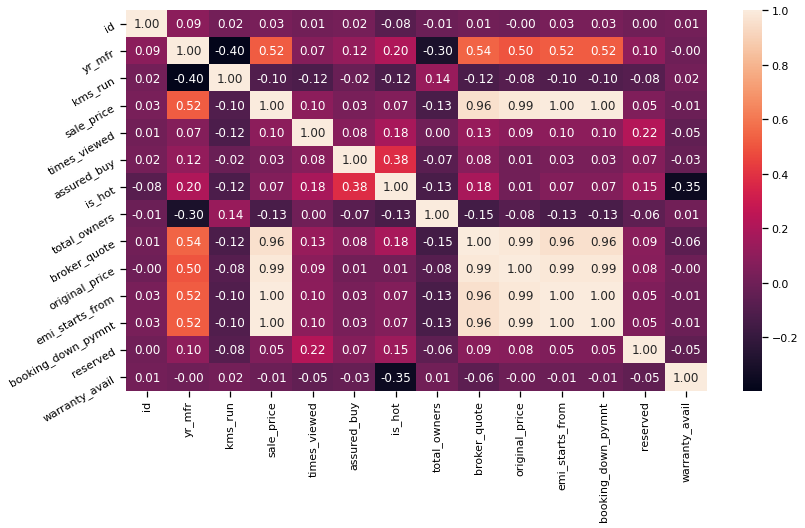

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

 **We can observe from above that sale_price,emi_starts_from,booking_down_pymnt
 original_price ,broker_quote are highly correlated and 
 sale_price is our target variable
That means emi_starts_from , booking_down_payment,original_price,broker_qoute effect more our target variable**

 **So we can keep any one of them and drop remaining columns**

 **Here i am removing above mentioned columns and keeping booking_down_payment as it is
 I am removing original_price also because as we observed above it has 2824 null values**

 **And also removing Id column because it doesn't effect our target column**

In [ ]:
def remove(df):
  df1=df.drop(['id','emi_starts_from','original_price','broker_quote'],axis=1)
  return df1
df1=remove(df)

In [ ]:
df1

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,True,pratapgarh,uttar pradesh,False,up72,online,toyota,fortuner,NaN,2,good,2019-09-06T04:20:28.916,False,165000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,False,gurgaon,haryana,False,hr26,online,hyundai,i20,NaN,1,overpriced,2019-09-02T09:43:11.541,False,55500,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,True,lucknow,uttar pradesh,False,up32,online,toyota,innova,NaN,2,overpriced,2019-08-28T14:42:16.246,False,62250,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,False,lucknow,uttar pradesh,False,up32,online,tata,indica ev2,NaN,2,overpriced,2019-08-26T06:10:57.269,False,22500,False,False


In [ ]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [ ]:
df1.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
car_rating               7
ad_created_on            1
fitness_certificate      8
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [ ]:
df1.shape

(6399, 26)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             6399 non-null   object
 1   yr_mfr               6399 non-null   int64 
 2   fuel_type            6399 non-null   object
 3   kms_run              6399 non-null   int64 
 4   sale_price           6399 non-null   int64 
 5   city                 6399 non-null   object
 6   times_viewed         6399 non-null   int64 
 7   body_type            6309 non-null   object
 8   transmission         5925 non-null   object
 9   variant              6399 non-null   object
 10  assured_buy          6399 non-null   bool  
 11  registered_city      6391 non-null   object
 12  registered_state     6391 non-null   object
 13  is_hot               6399 non-null   bool  
 14  rto                  6399 non-null   object
 15  source               6285 non-null   object
 16  make  

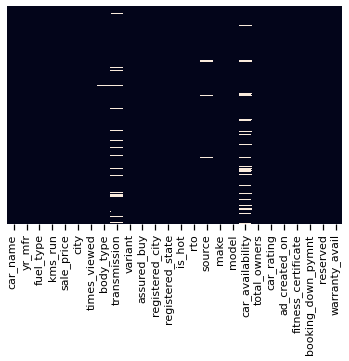

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

# 8.Handling missing values

**In our data body_type,transmission,source,car_availability,car_rating,ad_created_on,fitness_certificate,registered_city,registered_state contains null values our next step is to handle missing data**

In [ ]:
df1.dtypes

car_name               object
yr_mfr                  int64
fuel_type              object
kms_run                 int64
sale_price              int64
city                   object
times_viewed            int64
body_type              object
transmission           object
variant                object
assured_buy              bool
registered_city        object
registered_state       object
is_hot                   bool
rto                    object
source                 object
make                   object
model                  object
car_availability       object
total_owners            int64
car_rating             object
ad_created_on          object
fitness_certificate    object
booking_down_pymnt      int64
reserved                 bool
warranty_avail           bool
dtype: object

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("_____________________________________________________________________")
  #printing unique values of each column

id
[   1    2    3 ... 6397 6398 6399]
_____________________________________________________________________
car_name
['maruti swift' 'maruti alto 800' 'hyundai grand i10' 'maruti alto k10'
 'maruti ritz' 'hyundai i20' 'hyundai elite i20' 'renault kwid'
 'hyundai i10' 'honda brio' 'honda city' 'hyundai eon' 'hyundai verna'
 'maruti alto' 'hyundai santro xing' 'maruti swift dzire' 'ford ecosport'
 'nissan sunny' 'hyundai xcent' 'toyota etios liva' 'maruti celerio'
 'maruti baleno' 'hyundai new elantra' 'honda amaze' 'hyundai creta'
 'maruti wagon r 1.0' 'audi q3' 'maruti vitara brezza'
 'toyota corolla altis' 'toyota innova' 'renault scala' 'maruti dzire'
 'renault duster' 'tata tiago' 'maruti ertiga' 'datsun redi go'
 'honda wr-v' 'mahindra xuv500' 'maruti sx4' 'volkswagen polo'
 'maruti zen estilo' 'mahindra scorpio' 'toyota innova crysta' 'ford figo'
 'mitsubishi outlander' 'volkswagen ameo' 'nissan terrano' 'toyota etios'
 'volkswagen vento' 'audi a6' 'toyota fortuner' 'mahindra tuv

**Here i am replacing object type column missing values with their mode and numeric type columns with their mean**

In [ ]:
category_columns=df1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df1:
    if df1[column].isnull().any():
        if(column in category_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].mean)

In [ ]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [ ]:
df1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

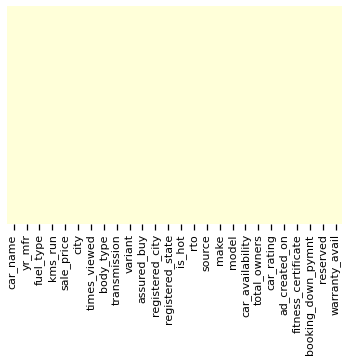

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df1.describe() #gives statistical description about our numerical data

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,booking_down_pymnt
count,6399.000000,6399.000000,6.399000e+03,6399.000000,6399.000000,6399.000000
mean,2013.895921,62382.210970,4.546049e+05,1534.860916,1.325988,68190.888576
std,3.088329,43087.788245,2.779465e+05,1965.452173,0.574816,41692.006252
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000
25%,2012.000000,31555.000000,2.822990e+05,554.000000,1.000000,42345.000000
50%,2014.000000,55490.000000,3.820990e+05,1080.000000,1.000000,57315.000000
75%,2016.000000,84145.000000,5.400000e+05,1912.000000,2.000000,81000.000000
max,2021.000000,996609.000000,3.600000e+06,46141.000000,6.000000,540000.000000


In [ ]:
df1.describe(include='object') #description about categorical data

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on
count,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399
unique,182,5,13,5,2,873,230,16,255,3,26,182,4,4,6398
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2019-02-20T14:13:30.464
freq,478,4001,1144,3888,5855,573,840,1820,331,6018,2756,478,6146,5454,2


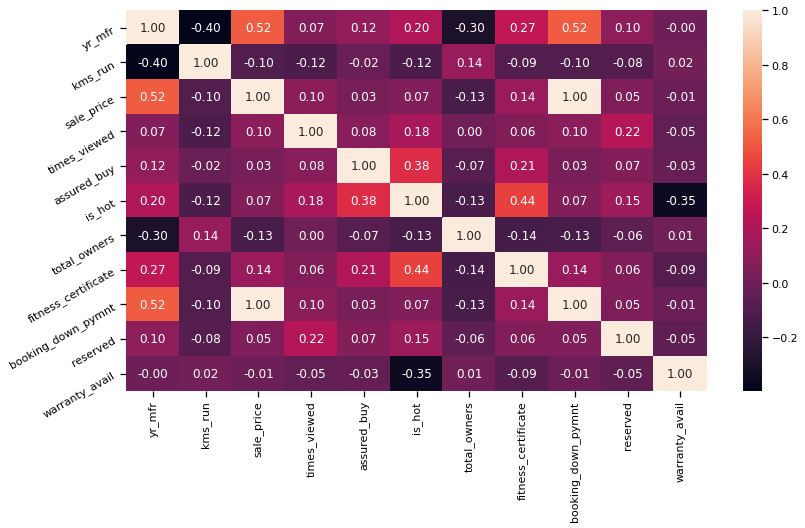

In [ ]:
#finding correlation again
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# 9.Handling Outliers

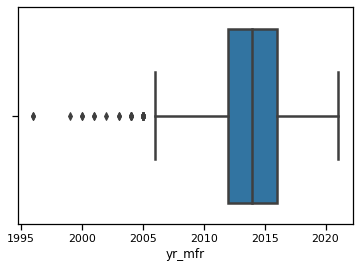

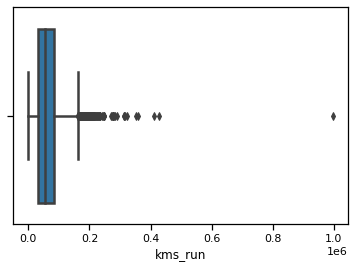

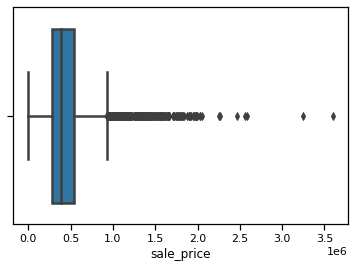

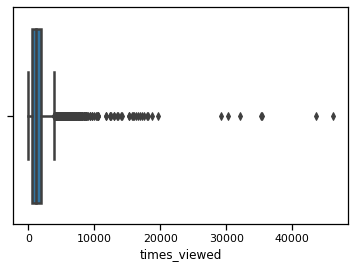

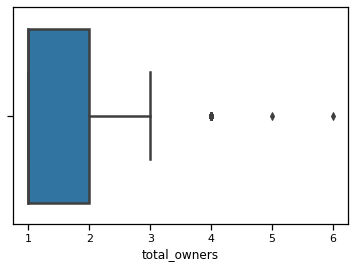

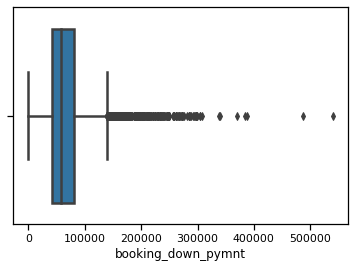

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

**We can observe from above box plots that we have to handle outliers in kms_run,sale_price and times_viewed column .**

**As sales_price and booking_down_payment are highly correlated handling one column will reflect on another**

**Taking kms_run upto max value**

In [ ]:
max_km=df1['kms_run'].max()
max_km

996609

In [ ]:
df1=df1[df1['kms_run']<max_km]
df1.shape

(6398, 26)

**From boxplot observations we can take sales_price < 2500000 only**

In [ ]:
df1=df1[df1['sale_price']<2500000]
df1.shape

(6394, 26)

**From boxplot observations we can take times_viewed < 20000 only**

In [ ]:
df1=df1[df1['times_viewed']<20000]
df1.shape

(6387, 26)

In [ ]:
df1=df1[df1['yr_mfr']>2005]
df1.shape

(6348, 26)

In [ ]:
#  df1=df1[df1['broker_quote']<2500000]
# df1.shape

In [ ]:
# def outlinefree(dataCol):
#     sorted(dataCol)
#         # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
#     Q1,Q3 = np.percentile(dataCol,[25,75])
#         # getting IQR (interquartile range)
#     IQR = Q3-Q1
#         # getting Lower range error
#     LowerRange = Q1-(1.5 * IQR)
#         # getting upper range error
#     UpperRange = Q3+(1.5 * IQR)
#         # return Lower range and upper range.
#     return LowerRange,UpperRange

In [ ]:
# lwyr_mfr,upyr_mfr = outlinefree(df1['yr_mfr'])
# lwkms_run,upkms_run = outlinefree(df1['kms_run'])
# lwsale_price,upsale_price = outlinefree(df1['sale_price'])
# lwtimes_viewed,uptimes_viewed = outlinefree(df1['times_viewed'])
# lwttl_own,upttl_own = outlinefree(df1['total_owners'])
# lwbdwnpy,updwnpy = outlinefree(df1['booking_down_pymnt'])

In [ ]:
# df1['yr_mfr'].replace(list(df1[df1['yr_mfr'] < lwyr_mfr].yr_mfr) ,lwyr_mfr,inplace=True)
# df1['kms_run'].replace(list(df1[df1['kms_run'] > upkms_run].kms_run) ,upkms_run,inplace=True)
# df1['sale_price'].replace(list(df1[df1['sale_price'] > upsale_price].sale_price) ,upsale_price,inplace=True)
# df1['times_viewed'].replace(list(df1[df1['times_viewed'] > uptimes_viewed].times_viewed) ,uptimes_viewed,inplace=True)
# #df1['total_owners'].replace(list(df1[df1['total_owners'] > upttl_own].total_owners) ,upttl_own,inplace=True)
# df1['booking_down_pymnt'].replace(list(df1[df1['booking_down_pymnt'] > updwnpy].booking_down_pymnt) ,updwnpy,inplace=True)

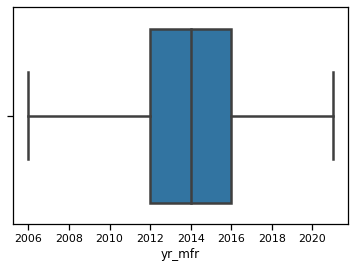

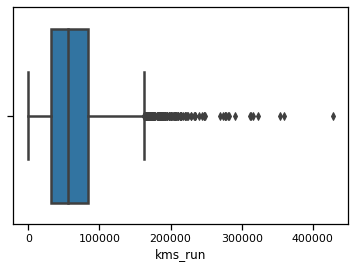

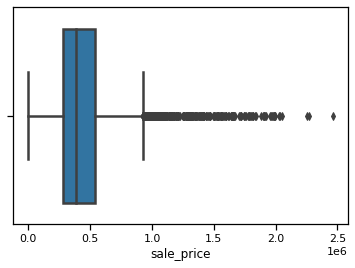

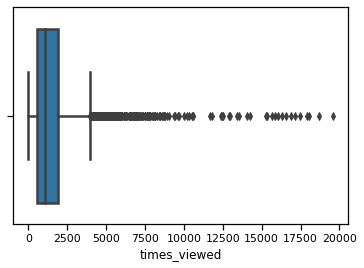

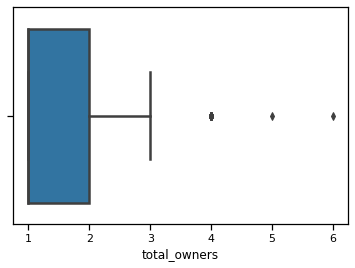

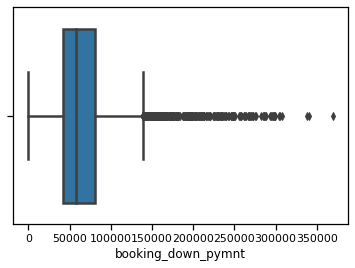

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

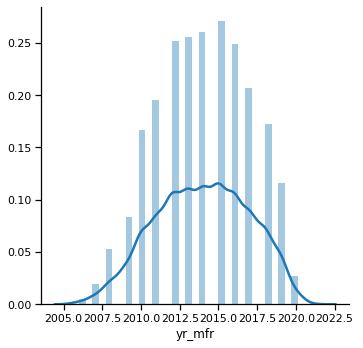

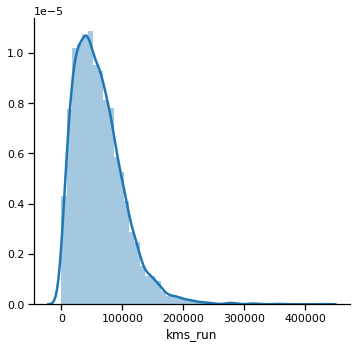

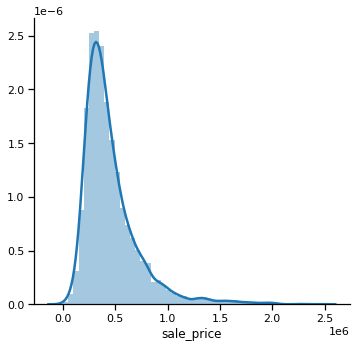

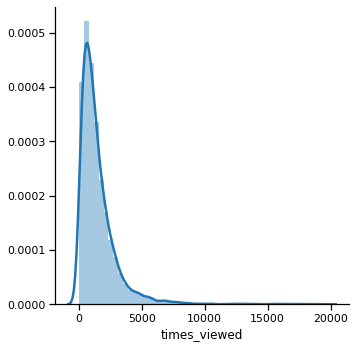

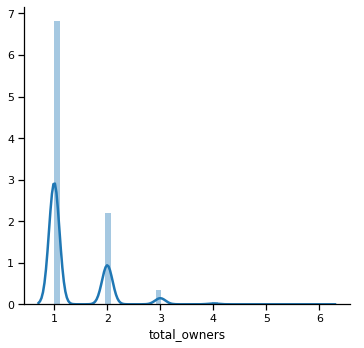

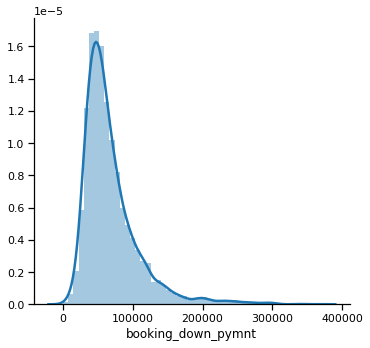

In [ ]:
for col1 in integer_columns:
  sns.FacetGrid(df1,height=5).map(sns.distplot,col1).add_legend()

**We can Observe that there is some skewness in our data**

<Figure size 432x288 with 0 Axes>

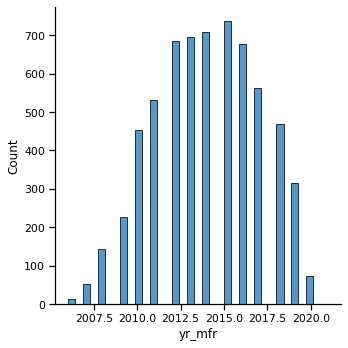

<Figure size 432x288 with 0 Axes>

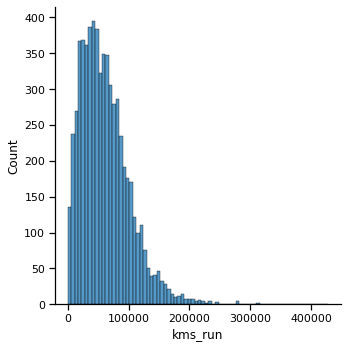

<Figure size 432x288 with 0 Axes>

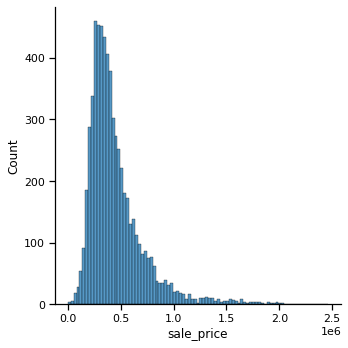

<Figure size 432x288 with 0 Axes>

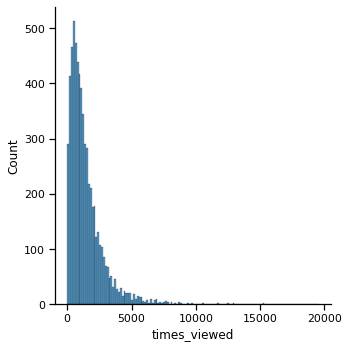

<Figure size 432x288 with 0 Axes>

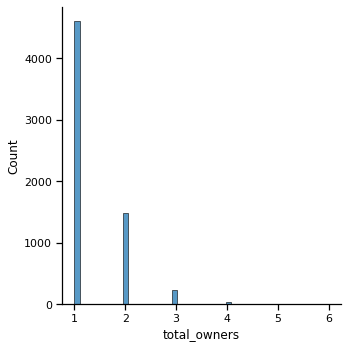

<Figure size 432x288 with 0 Axes>

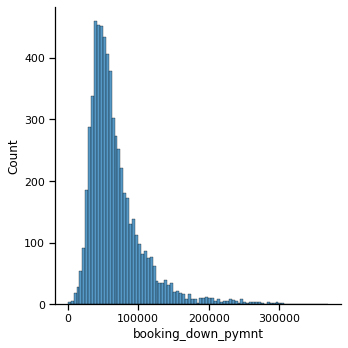

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.displot(df1[i])

# 10.Exploratory Data Analysis

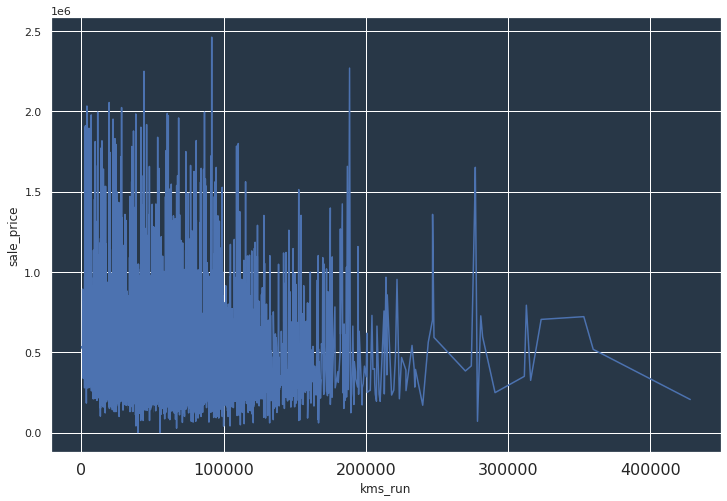

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='kms_run',y='sale_price',data=df1)

**From above graph we can say that there is not much relationship between kms_run and sale_price**

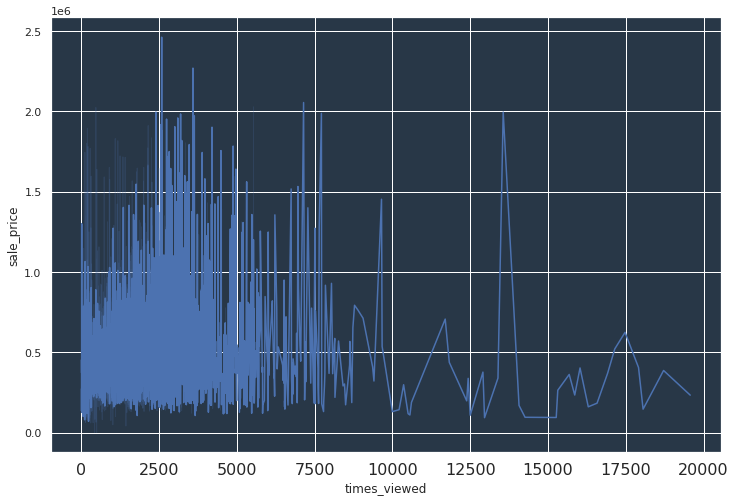

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='times_viewed',y='sale_price',data=df1)



**From above graph we can say that there is not much relationship between times_viewed and sale_price**

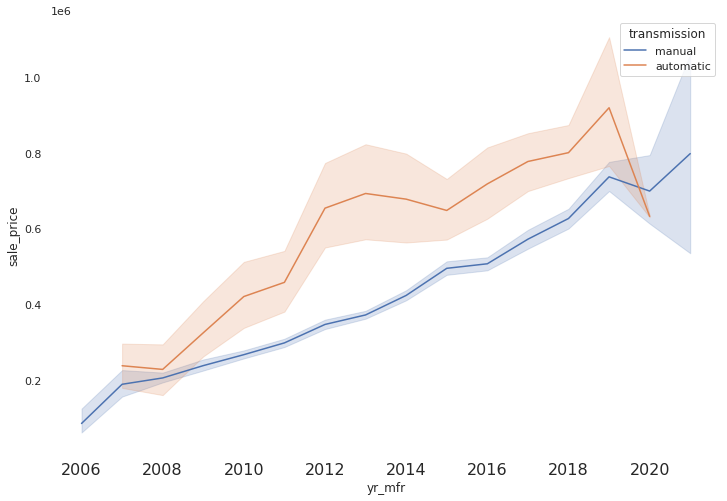

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df1,hue='transmission')

**From the above  figure we can observe the variation in prices of cars of two transmission categories in relation to their manufacturing year. **

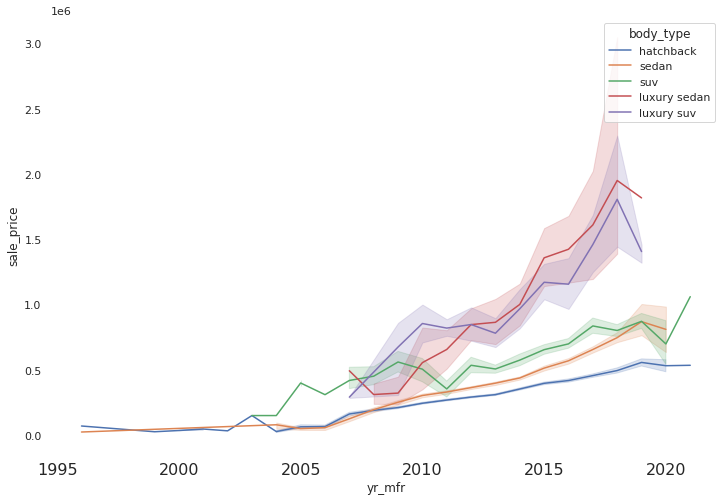

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': False,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df,hue='body_type')

**From the above  figure we can observe the variation in prices of cars of different body types in relation to their manufacturing year. **

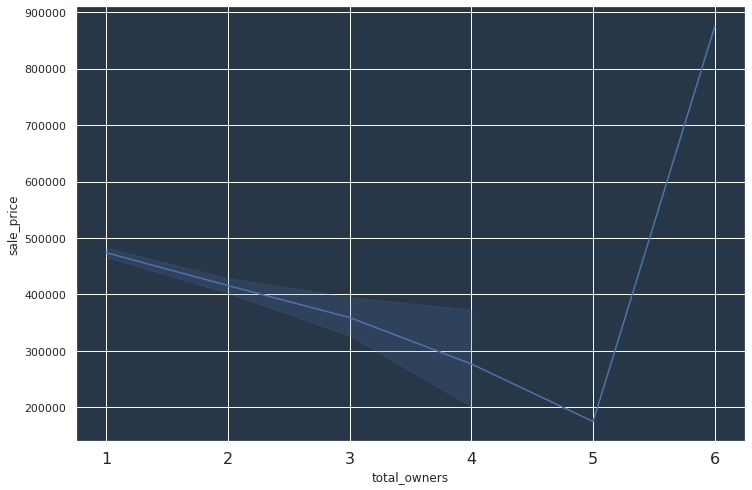

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='total_owners',y='sale_price',data=df1)

**From the above  figure we can observe the variability in prices of cars of two transmission categories in relation to their total_owners.We can see if total_owners are more the price of that car is generally less**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


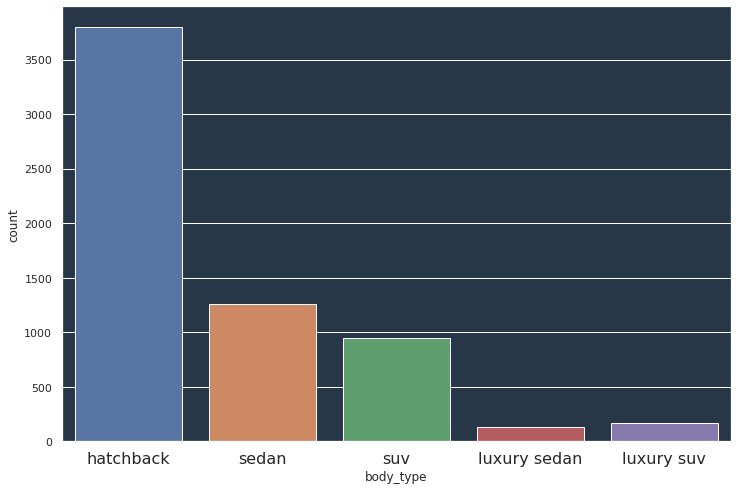

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.countplot(df['body_type'])

**we can observe that the cars with body type 'hatchback' are maximum.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


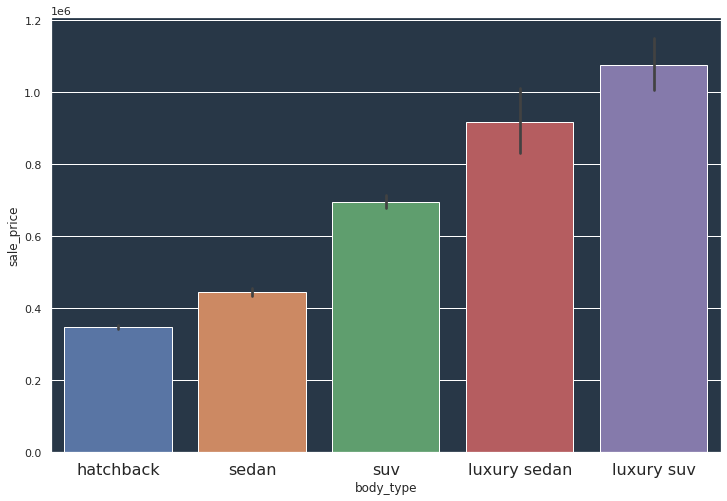

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['body_type'],df['sale_price'])

**We can observe that mean for luxury suv are is highest and around 1.05 . Inter quartile range is 1.0-1.2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


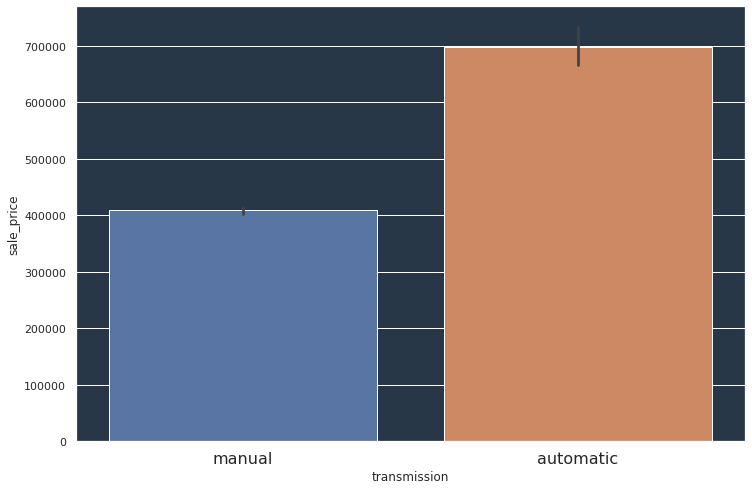

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['transmission'],df['sale_price'])

**We can observe that mean for automatic cars  is more and its value is 700000 . Inter quartile range is 670000-750000**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

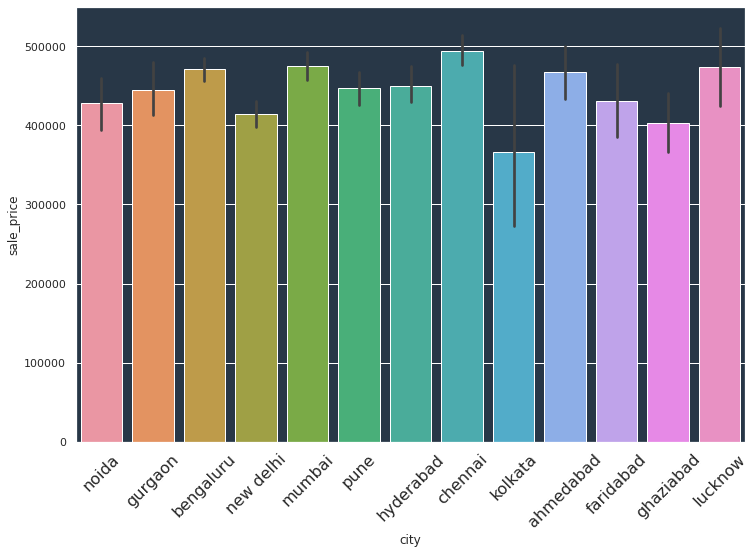

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['city'],df['sale_price'])
plt.xticks(rotation=45)

**We can observe that mean for cars from chennai  is highest and around 490000 . Inter quartile range is 1.0-1.2 470000-520000**

In [ ]:
#sns.pairplot(df1,kind='kde')

# 11.Loading and Handling Test Data

In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df_test.shape

(1000, 30)

In [ ]:
df_test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [ ]:
df_test.isnull().sum()

id                       0
car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               13
transmission            82
variant                  0
assured_buy              0
registered_city          2
registered_state         2
is_hot                   0
rto                      0
source                  12
make                     0
model                    0
car_availability        78
total_owners             0
broker_quote             0
original_price         455
car_rating               2
ad_created_on            0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

**We removed some columns in train data so we have to remove them in test data also**

In [ ]:
df_test1=remove(df_test)

In [ ]:
df_test1.shape

(1000, 26)

In [ ]:
df_test1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,inperson_sale,maruti,swift dzire,in_stock,3,great,2021-03-16T05:00:49.555,True,54645,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,inperson_sale,hyundai,eon,in_stock,1,great,2021-03-10T12:08:11.905,True,32520,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,inperson_sale,honda,amaze,in_stock,1,great,2021-03-15T12:03:30.041,True,58110,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,inperson_sale,hyundai,i20,in_transit,3,great,2021-04-09T11:16:26.157,True,54705,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,inperson_sale,hyundai,creta,in_stock,1,great,2021-04-01T07:24:31.712,True,162302,False,False


**Handling null values in test data**

In [ ]:
cateogry_columns=df_test1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test1:
    if df_test1[column].isnull().any():
        if(column in cateogry_columns):
            df_test1[column]=df_test1[column].fillna(df_test1[column].mode()[0])
        else:
            df_test1[column]=df_test1[column].fillna(df_test1[column].mean)

In [ ]:
df_test1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

# 12.Transformation for feature variables

**For Training Data**

**Standard Scaler for numerical data**

In [ ]:
X_train=df1.drop('sale_price',axis=1)
Y_train=df1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_train.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_train[num_d.columns] = sc.fit_transform(num_d)



In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,0.349191,petrol,-1.310500,noida,10.828115,hatchback,manual,lxi opt,0.445437,delhi,delhi,0.280817,dl6c,inperson_sale,maruti,swift,in_stock,1.191763,great,2021-04-04T07:09:18.583,0.121268,-0.255921,-0.520941,-0.171318
1,maruti alto 800,0.684490,petrol,-0.945148,noida,0.738056,hatchback,manual,lxi,0.445437,noida,uttar pradesh,0.280817,up16,inperson_sale,maruti,alto 800,in_stock,-0.564345,great,2021-03-22T14:07:32.833,0.121268,-0.704714,-0.520941,-0.171318
2,hyundai grand i10,1.019789,petrol,-0.937909,noida,-0.562284,hatchback,manual,sports 1.2 vtvt,0.445437,agra,uttar pradesh,0.280817,up80,inperson_sale,hyundai,grand i10,in_stock,-0.564345,great,2021-03-20T05:36:31.311,0.121268,0.082993,-0.520941,-0.171318
3,maruti swift,-0.321407,diesel,-0.556015,noida,3.150636,hatchback,manual,vdi,0.445437,delhi,delhi,0.280817,dl1c,inperson_sale,maruti,swift,in_stock,-0.564345,great,2021-01-21T12:59:19.299,0.121268,-0.546950,-0.520941,-0.171318
4,hyundai grand i10,0.349191,petrol,-0.969147,noida,1.083429,hatchback,manual,magna 1.2 vtvt,-2.244986,new delhi,delhi,0.280817,dl12,inperson_sale,hyundai,grand i10,in_stock,-0.564345,great,2021-04-01T13:33:40.733,0.121268,-0.348353,-0.520941,-0.171318


In [ ]:
X_train.nunique()

car_name                176
yr_mfr                   16
fuel_type                 5
kms_run                6193
city                     13
times_viewed           2945
body_type                 5
transmission              2
variant                 853
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     25
model                   176
car_availability          4
total_owners              6
car_rating                4
ad_created_on          6347
fitness_certificate       2
booking_down_pymnt     4024
reserved                  2
warranty_avail            2
dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_train[i]= label_encoder.fit_transform(X_train[i])
  


In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,99,0.349191,2,-1.310500,11,10.828115,0,1,503,0.445437,62,3,0.280817,36,1,13,143,0,1.191763,2,5154,1,-0.255921,-0.520941,-0.171318
1,82,0.684490,2,-0.945148,11,0.738056,0,1,492,0.445437,150,13,0.280817,227,1,13,10,0,-0.564345,2,4057,1,-0.704714,-0.520941,-0.171318
2,46,1.019789,2,-0.937909,11,-0.562284,0,1,600,0.445437,1,13,0.280817,242,1,7,69,0,-0.564345,2,3768,1,0.082993,-0.520941,-0.171318
3,99,-0.321407,0,-0.556015,11,3.150636,0,1,677,0.445437,62,3,0.280817,31,1,13,143,0,-0.564345,2,1014,1,-0.546950,-0.520941,-0.171318
4,46,0.349191,2,-0.969147,11,1.083429,0,1,517,-2.244986,148,3,0.280817,28,1,7,69,0,-0.564345,2,4986,1,-0.348353,-0.520941,-0.171318


In [ ]:
X_train1=X_train.values

In [ ]:
X_train1

array([[ 9.90000000e+01,  3.49190547e-01,  2.00000000e+00, ...,
        -2.55921460e-01, -5.20941390e-01, -1.71317731e-01],
       [ 8.20000000e+01,  6.84489532e-01,  2.00000000e+00, ...,
        -7.04714172e-01, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  1.01978852e+00,  2.00000000e+00, ...,
         8.29931357e-02, -5.20941390e-01, -1.71317731e-01],
       ...,
       [ 1.65000000e+02, -1.66260337e+00,  0.00000000e+00, ...,
        -1.49755442e-01, -5.20941390e-01, -1.71317731e-01],
       [ 1.44000000e+02, -9.92005395e-01,  0.00000000e+00, ...,
        -1.13346155e+00, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  3.49190547e-01,  0.00000000e+00, ...,
        -3.91041847e-01, -5.20941390e-01,  5.83710743e+00]])

**FOr Testing data**

In [ ]:
X_test=df_test1.drop('sale_price',axis=1)
Y_test=df_test1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_test.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_test[num_d.columns] = sc.fit_transform(num_d)



In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_test[i]= label_encoder.fit_transform(X_test[i])
  


In [ ]:
X_test.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,75,-0.589528,2,0.104385,12,0.155016,3,1,304,0.444528,66,5,0.280622,71,1,12,92,0,2.724196,2,530,1,-0.295997,-0.517134,-0.172818
1,29,-0.265077,2,-0.399505,5,-0.276043,0,1,153,0.444528,25,1,0.280622,23,1,6,36,0,-0.550078,2,457,1,-0.769566,-0.517134,-0.172818
2,18,-0.265077,0,-0.579503,12,0.429192,3,1,44,0.444528,52,5,0.280622,66,1,5,10,0,-0.550078,2,520,1,-0.221832,1.933736,-0.172818
3,34,-0.589528,2,-0.573947,1,-0.220172,0,1,217,0.444528,15,4,0.280622,64,1,6,52,1,2.724196,2,885,1,-0.294713,1.933736,-0.172818
4,27,1.032728,0,-0.228133,8,0.472853,4,0,55,0.444528,47,8,0.280622,112,1,6,28,0,-0.550078,2,762,1,2.008320,-0.517134,-0.172818


In [ ]:
X_test1=X_test.values
X_test1

array([[75.        , -0.58952782,  2.        , ..., -0.29599737,
        -0.51713356, -0.17281816],
       [29.        , -0.26507662,  2.        , ..., -0.7695663 ,
        -0.51713356, -0.17281816],
       [18.        , -0.26507662,  0.        , ..., -0.22183165,
         1.93373641, -0.17281816],
       ...,
       [68.        ,  1.35717934,  2.        , ...,  0.34067192,
        -0.51713356, -0.17281816],
       [18.        ,  0.38382576,  2.        , ..., -0.17977231,
         1.93373641, -0.17281816],
       [60.        ,  0.70827695,  2.        , ..., -0.55349044,
        -0.51713356, -0.17281816]])

In [ ]:
Y_test

array([ 364299,  216799,  387399,  364699, 1082011,  695999,  286399,
        283299,  346399,  205299, 1211594,  715299,  499099,  203899,
        224999,  307999,  157399,  383999,  620299,  188399,  450000,
        210099, 1155236,  242299,  270799,  387899,  417399,  651999,
        305099,  830699,  504899,   89099,  802199, 1389758,  397799,
        394099,  564299,  546199,  288499,  349299,  570399,  541499,
        240899,  443099,  694399,  180000,  416299,  141399,  500000,
        237199,  560999,  616799,  465599,  386799,  382799,  377299,
        626999,  336699,  567199,  520499,  249599,  487499,  419199,
       1248358,  340199,  410599,  366799,  571799,  438299, 1447530,
        415699,  401799,  182199,   89000,  312499, 1490758,  639499,
        102499,  673999,  111000,  267899,  491499,  371899,  726099,
       1112008,  595999,  509099,  444499,  367999, 1367538,  227099,
        328099,  302799,  450399,  359899, 1129683,  200000,  493399,
        490999,  234

In [ ]:
Y_train

array([386399, 265499, 477699, ..., 415000, 150000, 350000])

# **13.Training our Models**

# A) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train1,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(X_test1)

In [ ]:
tsc1=lr.score(X_test1,Y_test)
tsc1

0.9817375483261754

In [ ]:
sc1=lr.score(X_train1,Y_train)
sc1

0.9999999999969837

# B) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train1,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred2=lasso_reg.predict(X_test1)

In [ ]:
tsc2=lasso_reg.score(X_train1,Y_train)
tsc2

0.9999929336937445

In [ ]:
sc2=lasso_reg.score(X_test1,Y_test)
sc2

0.9815536630023565

# C) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train1,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred3=ridge_reg.predict(X_test1)

In [ ]:
tsc3=ridge_reg.score(X_train1,Y_train)
tsc3

0.9999999456417984

In [ ]:
sc3=ridge_reg.score(X_test1,Y_test)
sc3

0.9816965500055739

# D) Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train1, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred4=regressor.predict(X_test1)

In [ ]:
tsc4=regressor.score(X_train1,Y_train)
tsc4

0.9999242076965716

In [ ]:
sc4=regressor.score(X_test1,Y_test)
sc4

0.9442546464297783

# E) XGBOOST Regressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train1, Y_train)

[16:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred5=xgb.predict(X_test1)

In [ ]:
tsc5=regressor.score(X_train1,Y_train)
tsc5

0.9999242076965716

In [ ]:
sc5=regressor.score(X_test1,Y_test)
sc5

0.9442546464297783

# 14.Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def metric(y_test,y_predict):
    mae=mean_absolute_error(y_test,y_predict) #mean_absolute_error
    mse=mean_squared_error(y_test,y_predict) #mean_squared_error
    rmse=mean_squared_error(y_test,y_predict,squared=False)
    return [mae,mse,rmse]

In [ ]:
linearregressoin=metric(Y_test,y_pred)
linearregressoin.append(sc1)
linearregressoin.append(tsc1)
linearregressoin

[26448.012383326117,
 1771640806.5228229,
 42090.8636941893,
 0.9999999999969837,
 0.9817375483261754]

In [ ]:
lassoregression=metric(Y_test,y_pred2)
lassoregression.append(sc2)
lassoregression.append(tsc2)
lassoregression

[25923.51501300195,
 1789479525.508459,
 42302.24019491709,
 0.9815536630023565,
 0.9999929336937445]

In [ ]:
Ridgeregression=metric(Y_test,y_pred3)
Ridgeregression.append(sc3)
Ridgeregression.append(tsc3)
Ridgeregression

[26446.5164190759,
 1775618054.4342184,
 42138.0831841485,
 0.9816965500055739,
 0.9999999456417984]

In [ ]:
RandomForestRegressor=metric(Y_test,y_pred4)
RandomForestRegressor.append(sc4)
RandomForestRegressor.append(tsc4)
RandomForestRegressor

[28538.73115,
 5407857878.173094,
 73538.13893601805,
 0.9442546464297783,
 0.9999242076965716]

In [ ]:
XGBRegressor=metric(Y_test,y_pred5)
XGBRegressor.append(sc5)
XGBRegressor.append(tsc5)
XGBRegressor

[28202.3556171875,
 4607117369.702164,
 67875.74949643035,
 0.9442546464297783,
 0.9999242076965716]

In [ ]:
algorithms=['Linear Regression','Lasso Regression','Ridge Regression','Random Forest Regression','XGBoost Regression']
eval=pd.DataFrame([linearregressoin,lassoregression,Ridgeregression,RandomForestRegressor,XGBRegressor],columns=['Mean Squared Error','Mean Absolute Error','Root Mean SquareError','Test Score','Train Score'],index=algorithms)
eval

,Mean Squared Error,Mean Absolute Error,Root Mean SquareError,Test Score,Train Score
Linear Regression,26448.012383,1.771641e+09,42090.863694,1.000000,0.981738
Lasso Regression,25923.515013,1.789480e+09,42302.240195,0.981554,0.999993
Ridge Regression,26446.516419,1.775618e+09,42138.083184,0.981697,1.000000
Random Forest Regression,28538.731150,5.407858e+09,73538.138936,0.944255,0.999924
XGBoost Regression,28202.355617,4.607117e+09,67875.749496,0.944255,0.999924


In [ ]:
score=[]
for i in range(5):
  score.append(eval.iloc[:,3][i])
score

[0.9999999999969837,
 0.9815536630023565,
 0.9816965500055739,
 0.9442546464297783,
 0.9442546464297783]

# 15.Comparing Model Performances

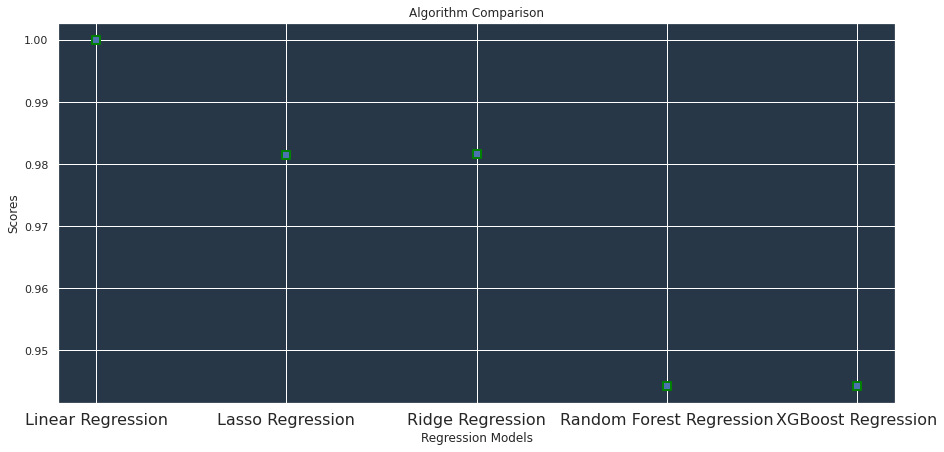

,score
Linear Regression,1.000000
Lasso Regression,0.981554
Ridge Regression,0.981697
Random Forest Regression,0.944255
XGBoost Regression,0.944255


In [ ]:

plt.figure(figsize=(15,7))
plt.scatter(algorithms,score,linewidth=2,s=50,marker='s',edgecolors='green')

plt.xlabel("Regression Models") 
plt.ylabel("Scores") 
plt.title("Algorithm Comparison")
plt.show()
df=pd.DataFrame(score,index=algorithms,columns=['score'])
df

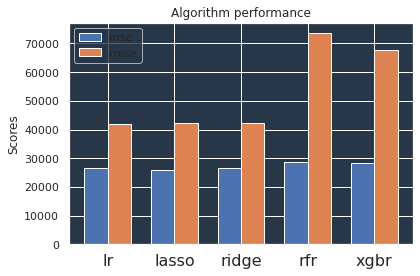

,Linear Regression,Lasso Regression,Ridge Regression,Random Forest Regression,XGBoost Regression
mse,26448.012383,25923.515013,26446.516419,28538.731150,28202.355617
rmse,42090.863694,42302.240195,42138.083184,73538.138936,67875.749496


In [ ]:
algo=['lr','lasso','ridge','rfr','xgbr']
ind = np.arange(len(score))  # the x locations for the groups
width = 0.35  # the width of the bars

fig,ax = plt.subplots()


rects1 = ax.bar(ind - width/2, eval['Mean Squared Error'], width, 
                label='mse')
rects2 = ax.bar(ind + width/2, eval['Root Mean SquareError'], width, 
                label='rmse')

ax.set_ylabel('Scores')
ax.set_title('Algorithm performance')
ax.set_xticks(ind)
ax.set_xticklabels(algo)
ax.legend()


def autolabel(rects, xpos='center'):
   

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")


fig.tight_layout()

plt.show()

df=pd.DataFrame([eval['Mean Squared Error'],eval['Root Mean SquareError']],columns=algorithms,index=['mse','rmse'])
df


# Observation from comparing model performances

 
*   From these above results it would suggest that Linear Regression is perhaps worthy of further study on this problem.
*   Among all the methods Linear Regression is the best of all which gives best results we can observe it's score (0.9999999999969837) and also We can observe from second graph that among all Linear Regression has lowest mse and rmse that means less error
*   So we can use **Linear Regression** for best results






# **16.Conclusion**

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.

In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value.

The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value.

We can observe from above that sale_price,emi_starts_from,booking_down_pymnt original_price ,broker_quote are highly correlated and sale_price is our target variable
Here i am removing above mentioned columns and keeping booking_down_payment as it is
I am removing original_price also because as we observed above it has 2824 null values.

Total Five Techniques were used in this study.

1.   Linear Regression
2.   Lasso Regression
3.   Ridge Regression
4.   Random Forest Regression
5.   XGBoost Regression

Below are the results observed in all the Five models

**Linear Regression**


*   Mean Squared Error = 26448.012383				
	  
*    Mean Absolute Error = 1.771641e+09
    
*    Root Mean SquareError = 42090.863694
    
*    Test Score = 0.999997
  	
*    Train Score = 0.981738

**Lasso Regression**
				

*   Mean Squared Error = 25923.515013		
	  
*    Mean Absolute Error = 1.789480e+09
    
*    Root Mean SquareError = 42302.240195
    
*    Test Score = 0.981554
  	
*    Train Score = 0.999993
				
**Ridge Regression**
				

*   Mean Squared Error = 26446.516419
	  
*    Mean Absolute Error = 1.775618e+09
    
*    Root Mean SquareError = 42138.083184
    
*    Test Score = 0.981697
  	
*    Train Score = 0.9999999456

**Random Forest Regression**
							

*   Mean Squared Error = 28538.731150
	  
*    Mean Absolute Error = 5.407858e+09
    
*    Root Mean SquareError = 73538.138936
    
*    Test Score = 0.944255
  	
*    Train Score = 0.999924	

**XGBoost Regression**
											

*   Mean Squared Error = 28202.355617
	  
*    Mean Absolute Error = 4.607117e+09
    
*    Root Mean SquareError = 67875.749496
    
*    Test Score = 0.944255
  	
*    Train Score = 0.999924

From these above results it would suggest that Linear Regression is perhaps worthy of further study on this problem.

Among all the methods Linear Regression is the best of all which gives best results we can observe it's score (0.9999999999969837) and also We can observe from second graph that among all Linear Regression has lowest mse and rmse that means less error.

I prefer Linear Regression for better predictions

so we can choose **Linear Regression**  as our final model which will predict best results





